<div class="text-primary">
    <div class="text-center">
        <div class="h1">FINAL PROJECT 1 - coronavirus</div>
        <div class="h5">maktabkhooneh</div>
    </div>
    <div class="h4">Name: Amir Mohammad Arghavany</div>
    <div class="h4">Email: amir.arghavoon@gmail.com</div>
</div>

# import packages

In [1]:
# base
import numpy as np
import pandas as pd
# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# train & test
from sklearn.model_selection import train_test_split
# hyper parameters
from sklearn.model_selection import GridSearchCV
# ML
from pycaret.regression import *
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# import dataset

In [2]:
dataset_1 = pd.read_csv('D:\DRIVER\LEARNING\OUT OF UNIVERSITY\ML\Quize\FINAL\F1\country_vaccinations.csv')
dataset_2 = pd.read_csv('D:\DRIVER\LEARNING\OUT OF UNIVERSITY\ML\Quize\FINAL\F1\country_vaccinations_by_manufacturer.csv')

# EDA & preprocessing

In [3]:
dataset_1.sample(4)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
12110,Honduras,HND,2021-04-05,NaN,NaN,NaN,NaN,765.0,NaN,NaN,NaN,77.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,http://www.salud.gob.hn/site/index.php/compone...
5153,Cayman Islands,CYM,2021-03-20,NaN,NaN,NaN,NaN,976.0,NaN,NaN,NaN,14851.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics
9085,Ethiopia,ETH,2021-06-07,1888214.0,1888214.0,NaN,5495.0,10639.0,1.64,1.64,NaN,93.0,Oxford/AstraZeneca,Ministry of Health,https://twitter.com/FMoHealth/status/141574678...
29622,United Arab Emirates,ARE,2021-07-05,15574641.0,7319003.0,6329949.0,40434.0,66201.0,157.47,74.00,64.0,6693.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",National Emergency Crisis and Disaster Managem...,https://fcsc.gov.ae/en-us/Pages/Covid19/UAE-Co...


In [4]:
# useful features
df_1 = dataset_1[['country', 'date', 'daily_vaccinations']]
df_1.sample(5)

,country,date,daily_vaccinations
29363,Ukraine,2021-04-29,27788.0
9461,Fiji,2021-06-27,5923.0
26033,Slovenia,2021-02-26,4322.0
4718,Cameroon,2021-06-24,1312.0
15755,Latvia,2021-06-23,9304.0


In [5]:
# check dataset
def dataset_info(df):
    print('='*50, '< info >')
    print(df.info(), '\n', '='*50, '< nunique >')
    print(df.nunique(), '\n', '='*50, '< isnull >')
    print(df.isna().sum(), '\n', '='*50, '< describe >')
    print(df.describe())
dataset_info(df_1)

================================================== < info >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31240 non-null  object 
 1   date                31240 non-null  object 
 2   daily_vaccinations  30948 non-null  float64
dtypes: float64(1), object(2)
memory usage: 732.3+ KB
None 
 ================================================== < nunique >
country                 218
date                    226
daily_vaccinations    17641
dtype: int64 
 ================================================== < isnull >
country                 0
date                    0
daily_vaccinations    292
dtype: int64 
 ================================================== < describe >
       daily_vaccinations
count        3.094800e+04
mean         1.149718e+05
std          8.460548e+05
min          0.000000e+00
25%          8.

In [6]:
# categorical to numerical (country)
LE = LabelEncoder()
c_val_before = df_1['country'].unique()
df_1['country'] = LE.fit_transform(df_1['country'])
c_val_after = df_1['country'].unique()
# categorical to numerical (date)
for i in ['year', 'month', 'day']:
    df_1[i] = df_1['date']
for i in range(len(df_1['date'])):
    df_1['year'][i] = float(df_1['date'][i].split('-')[0])
    df_1['month'][i] = float(df_1['date'][i].split('-')[1])
    df_1['day'][i] = float(df_1['date'][i].split('-')[2])
for i in ['year', 'month', 'day']:
    df_1[i] = df_1[i].astype(float)

In [7]:
# handeling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_1['daily_vaccinations'] = imputer.fit_transform(df_1[['daily_vaccinations']])

In [8]:
# recheck dataset
dataset_info(df_1)

================================================== < info >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31240 non-null  int32  
 1   date                31240 non-null  object 
 2   daily_vaccinations  31240 non-null  float64
 3   year                31240 non-null  float64
 4   month               31240 non-null  float64
 5   day                 31240 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 1.3+ MB
None 
 ================================================== < nunique >
country                 218
date                    226
daily_vaccinations    17642
year                      2
month                     8
day                      31
dtype: int64 
 ================================================== < isnull >
country               0
date                  0
daily_vaccinati

In [9]:
# split target and data
X_1 = df_1[['country', 'year', 'month', 'day']]
Y_1 = df_1['daily_vaccinations']

In [10]:
# scaling
SS = StandardScaler()
X_1 = pd.DataFrame(SS.fit_transform(X_1), columns=['country', 'year', 'month', 'day'])

In [11]:
# recreate df_1 with new X_1 (processed)
df_1 = pd.concat([X_1, Y_1], axis=1)
df_1.sample(5)

,country,year,month,day,daily_vaccinations
22405,0.750378,0.117159,-0.215514,-1.072395,26284.0
30961,1.735261,0.117159,0.844748,-1.186024,10240.0
29264,1.541513,0.117159,0.844748,-0.617879,8166.0
24331,0.960271,0.117159,0.314617,1.313817,274.0
18917,0.346738,0.117159,0.314617,1.313817,14.0


# pca

In [12]:
# it make bad effect on r2 score with any n_value (not used)
# n = 3
# pca = PCA(n_components=n)
# X_1 = pd.DataFrame(pca.fit_transform(X_1), columns=['component{}'.format(i+1) for i in range(n)])

# train & test

In [13]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)

# ML - pycaret

In [14]:
setup(data=df_1, target='daily_vaccinations', session_id=42, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,42
1,Target,daily_vaccinations
2,Target type,Regression
3,Original data shape,"(31240, 5)"
4,Transformed data shape,"(31240, 5)"
5,Transformed train set shape,"(21868, 5)"
6,Transformed test set shape,"(9372, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [15]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6524.3306,1166069754.5134,33099.6265,0.9981,1.0346,11.6833,4.2380
rf,Random Forest Regressor,8110.7928,3317555589.9721,53318.7212,0.9952,0.8540,7.6939,4.9830
xgboost,Extreme Gradient Boosting,17786.1908,5384916800.0000,70833.8309,0.9917,1.8636,26.7317,0.5800
dt,Decision Tree Regressor,8814.4084,6402739188.1824,67544.8613,0.9916,0.6865,7.2720,0.1210
lightgbm,Light Gradient Boosting Machine,38612.6803,25440174005.6023,157305.8587,0.9591,2.4635,109.2923,2.3160
gbr,Gradient Boosting Regressor,82166.9640,94112335713.9832,302300.8355,0.8675,3.1217,176.1240,1.6530
ada,AdaBoost Regressor,293933.8825,222789446186.6870,466160.1886,0.6695,4.4211,966.3702,1.0180
br,Bayesian Ridge,177711.7812,732037337907.2000,839576.8031,0.0044,3.8632,411.8499,0.0360
ridge,Ridge Regression,178235.3438,732033549926.4000,839587.9719,0.0043,3.8596,407.8921,0.0320
lar,Least Angle Regression,178236.6203,732033541734.4000,839588.0125,0.0043,3.8597,407.8841,0.0280


In [16]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7124.0949,1239751097.5500,35210.0994,0.9988,0.7409,1.8882
1,6453.3645,904238772.0919,30070.5632,0.9989,0.9140,2.3795
2,9935.3851,8373268256.6691,91505.5641,0.9899,0.7976,3.0920
3,8793.3296,2800541372.9190,52920.1415,0.9972,0.9298,3.4298
4,8078.0248,2545610366.7760,50454.0421,0.9924,0.8559,6.9586
5,6727.0460,934163083.9940,30564.0816,0.9959,0.9570,49.7826
6,8146.1639,3847376136.8712,62027.2209,0.9942,0.8729,2.3460
7,11136.4233,8112607329.8861,90070.0135,0.9904,0.8915,2.0450
8,8008.9919,3378594059.4303,58125.6747,0.9959,0.7572,2.2388


In [17]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
# pycaret random forest accuracy
rf_pred_pycaret = rf.predict(X1_test)
print('pycaret rf score:', np.round(r2_score(Y1_test, rf_pred_pycaret)*100, 2), '%')

pycaret rf score: 99.66 %


# ML - random forest

In [21]:
# hyper parameters -> using pycaret and GridSearchCV
param = {
    'criterion': ["squared_error"],
    'n_estimators': [50, 100, 150],
    'random_state': [42],
}
RFR = RandomForestRegressor()
GS = GridSearchCV(estimator=RFR, param_grid=param, scoring='accuracy', cv=5)
GS.fit(X1_train, Y1_train)
print(GS.best_score_)
print(GS.best_params_)

nan
{'criterion': 'squared_error', 'n_estimators': 50, 'random_state': 42}


In [22]:
# learning
RFR = RandomForestRegressor(n_estimators=50, random_state=42)
RFR.fit(X1_train, Y1_train)

RandomForestRegressor(n_estimators=50, random_state=42)

# accuracy

In [23]:
# ERROR
RFR_pred = RFR.predict(X1_test)
pd.DataFrame({
    'R2': [np.round(r2_score(Y1_test, RFR_pred), 3)],
    'MSE': [np.round(mean_squared_error(Y1_test, RFR_pred), 3)],
    'RMSE': [np.round(np.sqrt(mean_squared_error(Y1_test, RFR_pred)), 3)],
    'MAE': [np.round(mean_absolute_error(Y1_test, RFR_pred), 3)],
    'MAPE': [np.round(mean_absolute_percentage_error(Y1_test, RFR_pred), 3)]
})

,R2,MSE,RMSE,MAE,MAPE
0,0.997,1.799956e+09,42425.888,6478.291,5.138151e+16


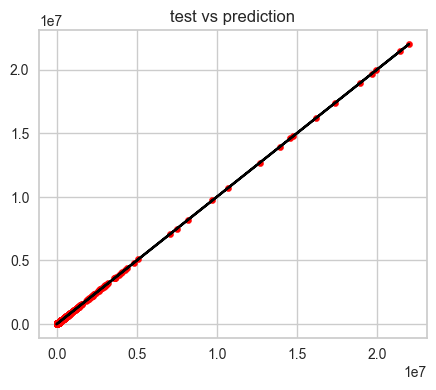

In [24]:
# test vs prediction
plt.figure(figsize=(5, 4))
plt.plot(Y1_test, Y1_test, c='black', label='Y_test')
plt.scatter(RFR_pred, RFR_pred, c='red', s=20, label='prediction')
plt.title('test vs prediction')
plt.show()

# use model & visualization

In [25]:
# countries code (sorted from A to Z)
c_val_dict = {
    'country (A-J)': c_val_before[:100],
    'code (A-J)': c_val_after[:100],
    'country (J-T)': c_val_before[100:200],
    'code (J-T)': c_val_after[100:200],
}
c_val_dict2 = {
    'country (T-Z)': c_val_before[200:],
    'code (T-Z)': c_val_after[200:]
}
pd.concat([pd.DataFrame(c_val_dict), pd.DataFrame(c_val_dict2)], axis=1)

,country (A-J),code (A-J),country (J-T),code (J-T),country (T-Z),code (T-Z)
0,Afghanistan,0,Jordan,100,Turkmenistan,200.0
1,Albania,1,Kazakhstan,101,Turks and Caicos Islands,201.0
2,Algeria,2,Kenya,102,Tuvalu,202.0
3,Andorra,3,Kosovo,103,Uganda,203.0
4,Angola,4,Kuwait,104,Ukraine,204.0
...,...,...,...,...,...,...
95,Israel,95,Togo,195,NaN,NaN
96,Italy,96,Tonga,196,NaN,NaN
97,Jamaica,97,Trinidad and Tobago,197,NaN,NaN
98,Japan,98,Tunisia,198,NaN,NaN


In [26]:
# use model like this -> my_data = [country, year, month, day]
# how many days should predict ? -> day_number = int 
my_data = [91, 2019, 9, 9]
day_number = 200
print('daily_vaccinations in {} :'.format(c_val_before[my_data[0]]), int(RFR.predict(SS.transform(np.array(my_data).reshape(1, -1)))[0]))

daily_vaccinations in Iran : 58422


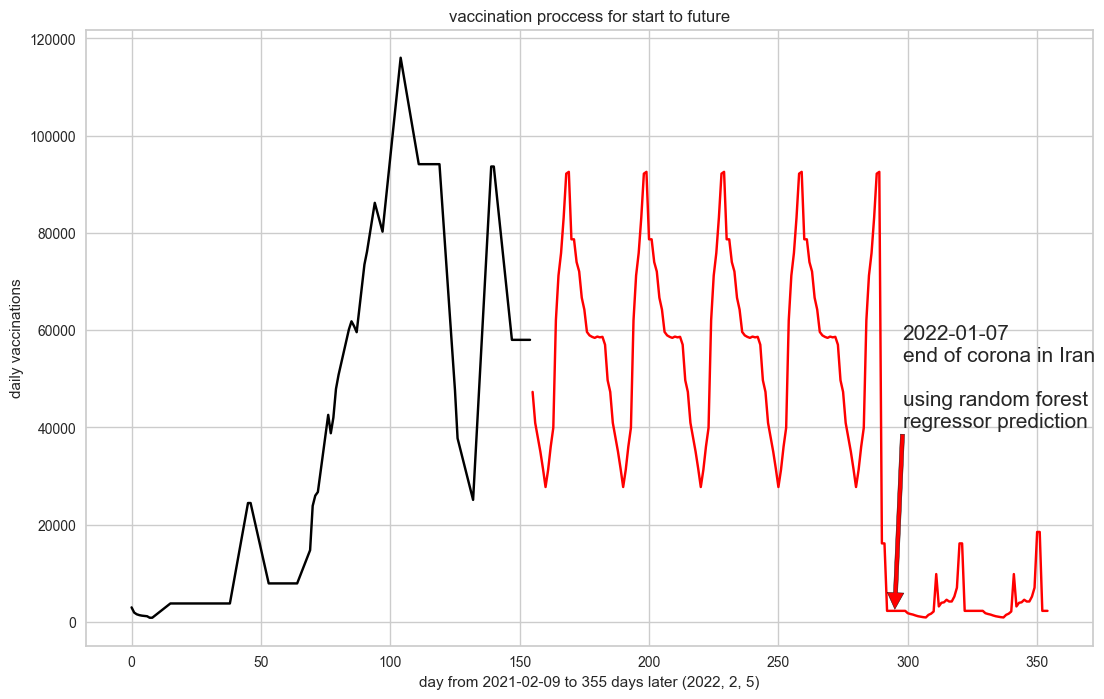

In [33]:
# handeling date format and predict future
df_1['date'] = dataset_1['date']
def date_future(day):
    month, year = 0, 0
    year = int(day/(12*30))
    month = int(day/30) - year*12
    day = day - month*30 - year*12*30
    return [year, month, day]
last_date = df_1.iloc[-1]['date'].split('-')
day = int(last_date[0])*30*12 + int(last_date[1])*30 + int(last_date[2])
future_vacc = []
for i in range(day_number):
    df = date_future(day+i)
    future_vacc.append(int(RFR.predict(SS.transform(np.array([my_data[0], df[0], df[1], df[2]]).reshape(1, -1)))[0]))    
# plot vaccination process and future prediction
country = SS.transform(np.array([my_data]).reshape(1, -1))[0][0]
a = df_1[df_1['country']==country][1:]
plt.figure(figsize=(13, 8))
plt.plot(np.arange(len(a['date'])), a['daily_vaccinations'], c='black')
plt.plot(np.arange(len(a['date']), len(a['date'])+day_number), future_vacc, c='red')
plt.title('vaccination proccess for start to future')
plt.xlabel('day from 2021-02-09 to {} days later {}'.format(len(a)+day_number, tuple(date_future(day+day_number))))
plt.ylabel('daily vaccinations')
if my_data[0] == 91:
    plt.annotate('2022-01-07\nend of corona in Iran\n\nusing random forest\nregressor prediction', xy=(295, 2600), xytext=(298, 40000), arrowprops=dict(facecolor='red', width=3), fontsize=15)
plt.show()